In [ ]:
import cv2
bild = cv2.imread("data\ped2//training//frames//01//000.jpg")
bild2 = cv2.imread("data\ped2//training//frames//01//001.jpg")
import numpy as np

lista = list()
lista.append(bild)
lista.append(bild2)

lista = np.array(lista)

In [ ]:
import cv2
import os
import numpy as np
bilder = list()
for folder in os.listdir("data//avenue//testing//frames"):
    path = os.path.join("data//avenue//testing//frames",folder)
    for img in os.listdir(path):
        bild = os.path.join(path,img)
        #bilder.append(cv2.imread(bild))
        bilder.append(bild)

#bilder = np.array(bilder)
    

In [ ]:
labels = np.load("data/frame_labels_ped2_2.npy")
#labels = np.reshape(labels,labels.shape[1])

In [ ]:
import pandas as pd
fjant = pd.DataFrame(data={"x_col":bilder,"y_col":labels})#columns=(["x_col","y_col"]))
fjant["y_col"] = fjant["y_col"].astype(str)

In [ ]:
from keras_preprocessing.image import ImageDataGenerator

dataget = ImageDataGenerator(rescale=1. / 255)
train_get = dataget.flow_from_dataframe(dataframe=fjant,x_col="x_col",y_col="y_col",class_mode="sparse",target_size=(360,240),batch_size=64)

__________________________

In [ ]:
import numpy as np
labels = np.load("data/frame_labels_avenue.npy")
labels = np.reshape(labels,labels.shape[1])

In [ ]:
noll = 0
ett = 0
for x in Y_test:
    if x == 0:
        noll += 1
    else:
        ett +=1
print("Noll: ",noll)
print("Ett: ",ett)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(bilder,labels,test_size=0.2, random_state= 10)

In [ ]:
#nylabels = np.concatenate((labels,nollor))
np.save("data/frame_labels_ped2_2.npy",nylabels)

In [ ]:
bilder = bilder.reshape(bilder.shape[0],bilder.shape[1],bilder.shape[2],bilder.shape[3],1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
bilder = scaler.fit_transform(bilder)

In [ ]:
output = np.full((2550,1),0)

In [ ]:
ett = bilder[0,:,:,:]

In [ ]:
import tensorflow.keras as keras
batch_size = 4
model = keras.Sequential()
inputs = keras.Input((240, 360, 3, 1))
#model.add(keras.layers.Conv3D(input_shape = ,activation="relu",filters=64,kernel_size=3,padding="same"))
model.add(keras.layers.Conv3D(activation="relu",filters=64,kernel_size=3,padding="same"))(inputs)
model.add(keras.layers.MaxPooling3D(pool_size=(2,2,1)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv3D(activation="relu",filters=64,kernel_size=3,padding="same"))
model.add(keras.layers.MaxPooling3D(pool_size=(2,2,1)))

model.add(keras.layers.Conv3D(activation="relu",filters=128,kernel_size=3,padding="same"))
model.add(keras.layers.MaxPooling3D(pool_size=(2,2,1)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dense(10,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",metrics=keras.metrics.categorical_crossentropy)
model.summary()

In [ ]:
model = keras.Sequential()

model.add(keras.layers.Conv3D(input_shape =(240, 360, 3, 1),activation="relu",filters=64,kernel_size=3,padding="same"))
model.add(keras.layers.MaxPooling3D(pool_size=(2,2,1)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv3D(activation="relu",filters=128,kernel_size=3,padding="same"))
model.add(keras.layers.MaxPooling3D(pool_size=(2,2,1)))

model.add(keras.layers.Conv3D(activation="relu",filters=128,kernel_size=2,padding="same"))
model.add(keras.layers.MaxPooling3D(pool_size=(2,2,1)))
model.add(keras.layers.Dense(64,activation="relu"))
#model.add(keras.layers.GlobalAveragePooling3D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(64,activation="relu"))
model.add(keras.layers.Dense(10,activation="relu"))
model.add(keras.layers.Dense(1,activation="sigmoid"))

In [ ]:
from tensorflow.keras.layers import Dense,Conv3D,MaxPooling3D,BatchNormalization,Flatten,Input, Add
from tensorflow.keras.models import Model
input = Input((240,360,3,1))

x = Conv3D(64,3,padding="same")(input)
x = MaxPooling3D(pool_size=(3,3,3))(x)
x = Flatten()(x)
x = Dense(128)(x)

#y = Dense(128)(input)
y = Flatten()(input)
y = Dense(128)(y)
y = Dense(128)(y)
x = Add()([x,y])
x = Dense(10)(x)
x = Dense(1)(x)

model = Model(inputs = input,outputs = x)
model.compile()
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)


In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True)

In [ ]:
with open('data//UCFCrime2Local//UCFCrime2Local//Train_split_AD.txt') as f:
    lines = f.readlines()

In [ ]:
import cv2 
import numpy as np 
import os
from pathlib import *

path = "data/UFC"

films = list()
files = (x for x in Path(path).iterdir() if x.is_file())
for file in files:
    #print(str(file.name).split("_")[0], "is a file!")
    films.append(str(file.name).split("_")[0])
    

In [ ]:
for x in range(len(lines)):
    if lines[x].strip() != films[x]:
        print(lines[x])
        break

In [4]:
import cv2 
import numpy as np 
import os
from pathlib import *

path = "data//UCFCrime2Local//UCFCrime2Local//Txt annotations"

files = (x for x in Path(path).iterdir() if x.is_file())
for file in files:
    films = list()
    name = file.name.split(".")[0]
    with open(file) as f:
        lines = f.readlines()
        for line in lines:
            lost = int(line.split(" ")[6])
            if lost == 0:
                lost = 1
            else:
                lost = 0
            films.append(lost)
        films = np.array(films)
        np.save(os.path.join("data//UFC//training",name + ".npy"),films)
        
    #print(str(file.name).split("_")[0], "is a file!")
    #films.append(str(file.name).split(" ")[6])

In [1]:
import cv2 
import numpy as np 
import os
from pathlib import *

file = "data//UCFCrime2Local//UCFCrime2Local//Txt annotations//Burglary099.txt"

films = list()
name = "Burglary099"
with open(file) as f:
    lines = f.readlines()
    for line in lines:
        lost = int(line.split(" ")[6])
        if lost == 0:
            lost = 1
        else:
            lost = 0
        films.append(lost)
    films = np.array(films)
    np.save(os.path.join("data//UFC//testing",name + ".npy"),films)

In [16]:
import numpy as np
assult = np.load("data//UFC//testing//NormalVideos004.npy")

In [18]:
sub = os.listdir("data//UFC//training//frames")

In [1]:
sub = os.listdir("data//UFC//testing//frames")

In [20]:
import numpy as np
for name in sub:
    if "Normal" in name:
        files = os.listdir(os.path.join("data//UFC//training//frames",name))
        name = name.split("_")[0:2]
        name = name[0] + name[1]
        tom = np.zeros((len(files),),np.int8)
        np.save(os.path.join("data//UFC//training",name),tom)
        
        

In [1]:
import tensorflow.keras as keras

keras.models.load_model("flow_inception_i3d_kinetics_only_tf_dim_ordering_tf_kernels_no_top.h5")

ValueError: No model found in config file.

In [1]:
import math
import tensorflow.keras as keras
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import config
from utils import Dataloader
from sklearn.metrics import roc_auc_score , roc_curve
from pathlib import *

gpus = config.experimental.list_physical_devices('GPU') 
config.experimental.set_memory_growth(gpus[0], True)

test_bilder = list()
for folder in os.listdir("data//UFC//testing//frames"):
    path = os.path.join("data//UFC//testing//frames",folder)
    #bildmappar.append(folder)
    for img in os.listdir(path):
        bild = os.path.join(path,img)
        test_bilder.append(bild)
    


test_etiketter = list()
path = "data//UFC//testing"
testnings_ettiketter = (x for x in Path(path).iterdir() if x.is_file())
for ettiket in testnings_ettiketter:
    test_etiketter.append(np.load(ettiket))
    

test_etiketter = np.concatenate(test_etiketter,axis=0)
batch_size = 16
test_gen = Dataloader(test_bilder,test_etiketter,batch_size)
reconstructed_model = keras.models.load_model("modelUFC3D_4-ep004-loss0.367-val_loss0.421.tf")
validation_steps = math.floor( len(test_bilder) / batch_size)


In [2]:
y_score = reconstructed_model.predict(test_gen,verbose=1)

6241/6241 [==============================] - 1368s 219ms/step


In [7]:

auc = roc_auc_score(test_etiketter,y_score=y_score)
print('AUC: ', auc*100, '%')

AUC:  68.04392542758247 %


In [14]:
with open('y_score.npy', 'wb') as f:
    np.save(f, y_score)

<function matplotlib.pyplot.show(close=None, block=None)>

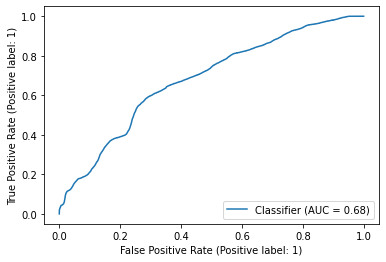

<Figure size 1296x432 with 0 Axes>

In [13]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(test_etiketter,y_score)

plt.figure(figsize=(18, 6))
plt.get_figlabels()
plt.show